In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
gold = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/Gold%201968-present%20(cleaned).csv")
gold.shape

(13350, 2)

In [0]:
gold.describe()

,closing_price
count,13350.000000
mean,526.193945
std,434.811115
min,34.750000
25%,276.300000
50%,379.850000
75%,643.687500
max,1895.000000


In [0]:
(gold == 0).sum()

observation_date    0
closing_price       0
dtype: int64

In [0]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13350 entries, 0 to 13349
Data columns (total 2 columns):
observation_date    13350 non-null object
closing_price       13350 non-null float64
dtypes: float64(1), object(1)
memory usage: 208.7+ KB


In [0]:
gold.head(12)

,observation_date,closing_price
0,1968-04-01,37.70
1,1968-04-02,37.30
2,1968-04-03,37.60
3,1968-04-04,36.95
4,1968-04-05,37.00
5,1968-04-08,37.05
6,1968-04-09,37.50
7,1968-04-10,37.70
8,1968-04-11,38.00
9,1968-04-12,38.00


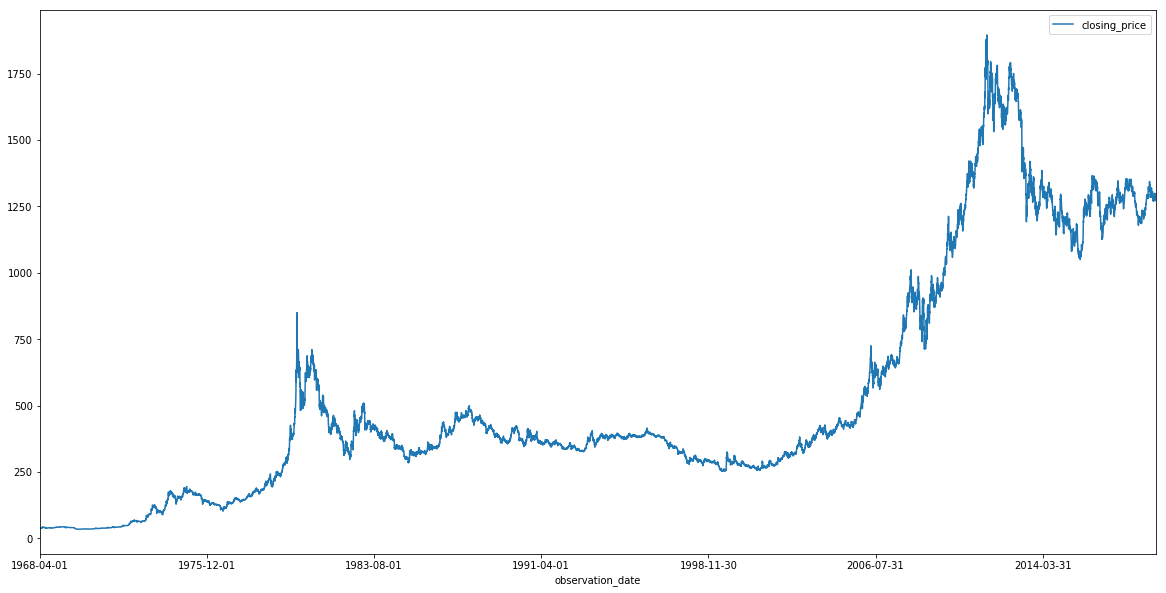

In [0]:
gold.plot(x="observation_date", y="closing_price", figsize=(20, 10));

In [0]:
df_gold = gold.set_index('observation_date')

In [0]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13350 entries, 1968-04-01 to 2019-05-31
Data columns (total 1 columns):
closing_price    13350 non-null float64
dtypes: float64(1)
memory usage: 208.6+ KB


In [0]:
df_gold.head(12)

,closing_price
observation_date,
1968-04-01,37.70
1968-04-02,37.30
1968-04-03,37.60
1968-04-04,36.95
1968-04-05,37.00
1968-04-08,37.05
1968-04-09,37.50
1968-04-10,37.70
1968-04-11,38.00


In [0]:
quakes = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/Earthquakes%205.5%201900-present.csv")
quakes.shape

(30251, 22)

In [0]:
quakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,30251.000000,30251.000000,29997.000000,30251.000000,7109.000000,8354.000000,2672.000000,18486.000000,2234.000000,5610.000000,1369.000000,3611.000000
mean,4.282117,37.327246,64.094516,5.951607,273.044732,44.853689,4.189849,1.018730,7.666862,5.078937,0.061660,47.232069
std,30.930651,125.660867,115.575820,0.471951,162.453989,35.404920,5.449785,0.360655,8.588187,20.749316,0.031673,62.862633
min,-77.080000,-179.997000,-4.000000,5.500000,0.000000,0.000000,0.004505,0.000000,0.085000,0.000000,0.000000,0.000000
25%,-17.616000,-79.147000,15.000000,5.600000,144.000000,24.000000,1.142500,0.900000,5.600000,1.800000,0.047000,14.000000
50%,-0.856000,100.063000,33.000000,5.800000,252.000000,35.900000,2.489500,1.000000,7.000000,3.100000,0.057000,30.000000
75%,32.038000,144.442000,47.000000,6.200000,381.000000,54.200000,4.895000,1.120000,8.300000,5.400000,0.068000,57.500000
max,86.922900,180.000000,700.000000,9.500000,934.000000,360.000000,37.874000,42.410000,99.000000,1312.300000,0.410000,941.000000


In [0]:
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 22 columns):
time               30251 non-null object
latitude           30251 non-null float64
longitude          30251 non-null float64
depth              29997 non-null float64
mag                30251 non-null float64
magType            30251 non-null object
nst                7109 non-null float64
gap                8354 non-null float64
dmin               2672 non-null float64
rms                18486 non-null float64
net                30251 non-null object
id                 30251 non-null object
updated            30251 non-null object
place              30248 non-null object
type               30251 non-null object
horizontalError    2234 non-null float64
depthError         5610 non-null float64
magError           1369 non-null float64
magNst             3611 non-null float64
status             30251 non-null object
locationSource     30251 non-null object
magSource          30251 

In [0]:
quakes.sample(12)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
26806,1957-01-26T16:30:50.000Z,42.5200,42.3520,10.0,5.6,mw,NaN,NaN,NaN,NaN,iscgem,iscgem885880,2015-05-13T18:52:51.000Z,Georgia (Sak'art'velo),earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
19025,1980-01-23T06:52:50.000Z,52.3410,160.1910,33.0,5.7,mb,NaN,NaN,NaN,NaN,us,usp000154c,2016-11-09T21:44:00.113Z,"off the east coast of the Kamchatka Peninsula,...",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1911,2015-03-30T08:48:25.340Z,-15.4994,-173.0293,11.0,6.5,mww,NaN,36.0,4.629,0.9,us,us10001ryu,2016-11-10T21:46:55.900Z,"91km ENE of Hihifo, Tonga",earthquake,8.5,1.7,NaN,NaN,reviewed,us,us
20134,1977-04-20T23:42:50.500Z,-9.8900,160.3480,19.0,7.5,ms,NaN,NaN,NaN,NaN,us,usp0000ngg,2017-04-26T17:30:41.591Z,Solomon Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
17272,1984-09-20T04:17:24.440Z,60.3220,-146.0010,18.2,5.5,mw,NaN,NaN,NaN,0.8,us,usp00027hb,2018-06-04T20:43:45.000Z,Southern Alaska,earthquake,NaN,1.8,NaN,NaN,reviewed,us,hrv
12966,1993-07-11T13:36:21.240Z,-25.3040,-70.1660,47.5,6.6,mw,NaN,NaN,NaN,1.2,us,usp0005vyp,2017-04-13T22:05:36.161Z,"Antofagasta, Chile",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
13653,1992-03-26T14:14:11.980Z,51.2220,-179.7230,33.0,6.0,mw,NaN,NaN,NaN,1.1,us,usp00054vt,2016-11-09T22:10:10.852Z,"Andreanof Islands, Aleutian Islands, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
14792,1989-10-27T01:45:55.080Z,39.8230,143.6920,9.1,6.4,mw,NaN,NaN,NaN,1.0,us,usp00041b1,2016-11-10T00:50:15.406Z,"off the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,nc
13404,1992-08-24T19:40:34.900Z,-56.6220,-26.5520,106.6,6.1,mw,NaN,NaN,NaN,0.9,us,usp0005d02,2016-11-09T23:19:29.163Z,South Sandwich Islands region,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
29978,1920-12-16T12:05:55.000Z,36.8880,105.6060,15.0,8.3,mw,NaN,NaN,NaN,NaN,iscgem,iscgem912687,2018-01-18T19:07:09.087Z,"Gansu-Ningxia border region, China",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem


In [0]:
pd.options.mode.chained_assignment = None  # default='warn'
df_quakes = quakes[['time', 'mag']]
df_quakes.time = df_quakes.time.str[:10]
df_quakes = df_quakes.sort_values(by=['time'])
df_quakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30251 entries, 30250 to 0
Data columns (total 2 columns):
time    30251 non-null object
mag     30251 non-null float64
dtypes: float64(1), object(1)
memory usage: 709.0+ KB


In [0]:
df = df_quakes[df_quakes['time'] >= "1968-04-01"]
df_quakes = df[df['mag'] >= 6.7]
df_quakes = df_quakes.reset_index(drop=True)
df_quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 2 columns):
time    1448 non-null object
mag     1448 non-null float64
dtypes: float64(1), object(1)
memory usage: 22.7+ KB


In [0]:
df_quakes.head(12)

,time,mag
0,1968-04-01,7.5
1,1968-04-01,6.8
2,1968-05-14,6.7
3,1968-05-16,8.2
4,1968-05-16,7.9
5,1968-05-20,7.0
6,1968-05-20,6.9
7,1968-05-20,7.0
8,1968-05-23,7.2
9,1968-05-28,7.5


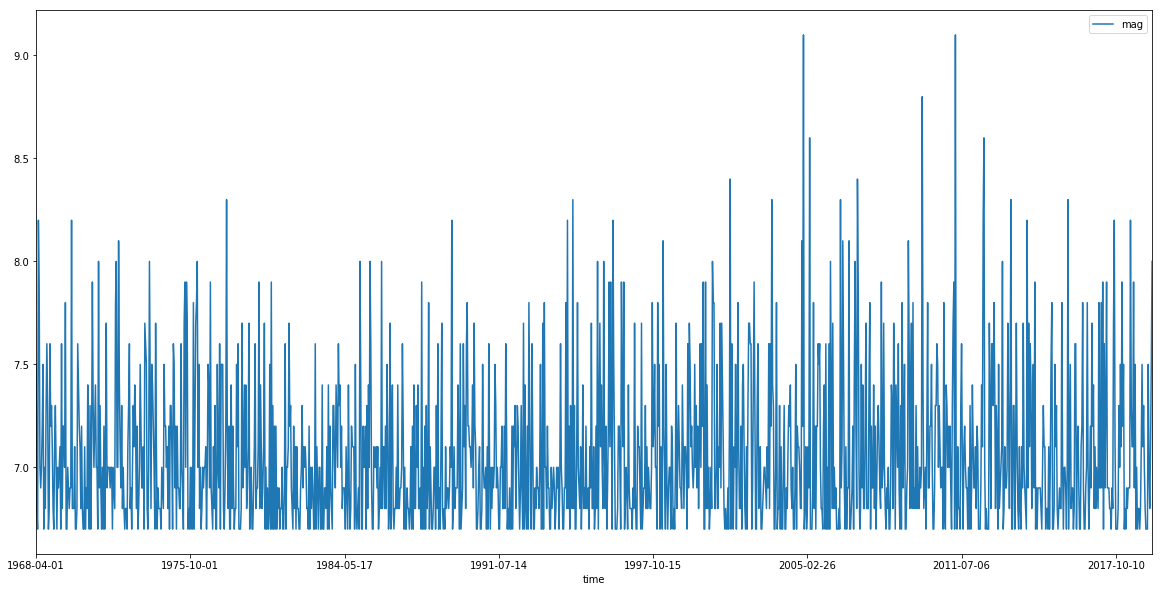

In [0]:
df_quakes.plot(x="time", y="mag", figsize=(20, 10));

In [0]:
def get_next_trading_day(date_in):
  t1 = date_in
  dayz = 1
  while t1 not in df_gold.index:
    t1 = pd.to_datetime(date_in).date() + datetime.timedelta(days=dayz)
    t1 = t1.strftime('%Y-%m-%d')
    dayz += 1
  return t1 

In [0]:
import datetime
i = -1
data = []
for _, row in df_quakes.iterrows():

  i += 1
  
  if row.time > "2019-04-15":
    continue
    
  t0 = get_next_trading_day(row.time)
  
  t1 = pd.to_datetime(row.time).date() + datetime.timedelta(days=7)
  t1 = t1.strftime('%Y-%m-%d')
  t1 = get_next_trading_day(t1)

  t2 = pd.to_datetime(row.time).date() + datetime.timedelta(days=14)
  t2 = t2.strftime('%Y-%m-%d')
  t2 = get_next_trading_day(t2)
  
  t3 = pd.to_datetime(row.time).date() + datetime.timedelta(days=30)
  t3 = t3.strftime('%Y-%m-%d')
  t3 = get_next_trading_day(t3)

  x = (row.time, row.mag, df_gold.loc[t0].closing_price, df_gold.loc[t1].closing_price,
            df_gold.loc[t2].closing_price, df_gold.loc[t3].closing_price)

  data.append(x)

In [0]:
df_quake_gold = pd.DataFrame(data=data, columns=['Date', 'Mag', 'Price_Day_0', 'Price_Day_7', 'Price_Day_14', 'Price_Day_30'])

In [0]:
df_quake_gold.head(15)

,Date,Mag,Price_Day_0,Price_Day_7,Price_Day_14,Price_Day_30
0,1968-04-01,7.5,37.70,37.05,38.00,39.200
1,1968-04-01,6.8,37.70,37.05,38.00,39.200
2,1968-05-14,6.7,39.80,42.40,41.50,41.300
3,1968-05-16,8.2,42.25,41.40,41.95,40.700
4,1968-05-16,7.9,42.25,41.40,41.95,40.700
5,1968-05-20,7.0,42.30,41.50,41.55,41.400
6,1968-05-20,6.9,42.30,41.50,41.55,41.400
7,1968-05-20,7.0,42.30,41.50,41.55,41.400
8,1968-05-23,7.2,41.40,41.95,41.20,40.900
9,1968-05-28,7.5,41.50,41.15,41.55,40.900


In [0]:
df_quake_gold["Appr_Day_7"] = 100 * (df_quake_gold["Price_Day_7"] - df_quake_gold["Price_Day_0"]) / df_quake_gold["Price_Day_0"]
df_quake_gold["Appr_Day_14"] = 100 * (df_quake_gold["Price_Day_14"] - df_quake_gold["Price_Day_0"]) / df_quake_gold["Price_Day_0"]
df_quake_gold["Appr_Day_30"] = 100 * (df_quake_gold["Price_Day_30"] - df_quake_gold["Price_Day_0"]) / df_quake_gold["Price_Day_0"]

In [0]:
df_quake_gold.describe()

,Mag,Price_Day_0,Price_Day_7,Price_Day_14,Price_Day_30,Appr_Day_7,Appr_Day_14,Appr_Day_30
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,7.062007,555.989802,556.178597,556.330292,556.714097,0.118261,0.284618,0.527040
std,0.372909,453.126549,452.804558,452.245794,451.191383,2.581509,3.587273,5.395322
min,6.700000,34.800000,34.750000,34.750000,34.950000,-17.264957,-12.924570,-17.702312
25%,6.800000,286.100000,284.800000,285.100000,285.700000,-1.194217,-1.500423,-2.208542
50%,7.000000,384.950000,384.800000,384.950000,383.800000,0.065257,0.129199,0.072464
75%,7.200000,795.000000,803.250000,801.750000,815.125000,1.292861,1.851852,2.721893
max,9.100000,1895.000000,1895.000000,1895.000000,1806.500000,16.921351,25.812385,39.607843


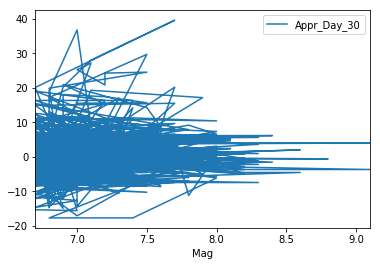

In [0]:
df_quake_gold.plot(x="Mag", y="Appr_Day_30")

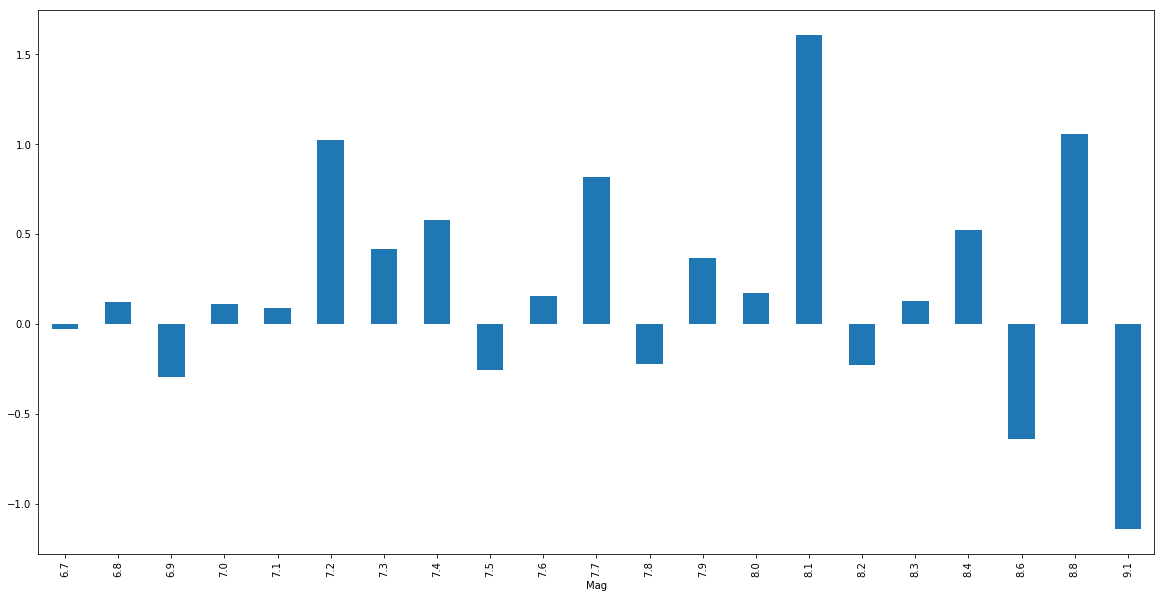

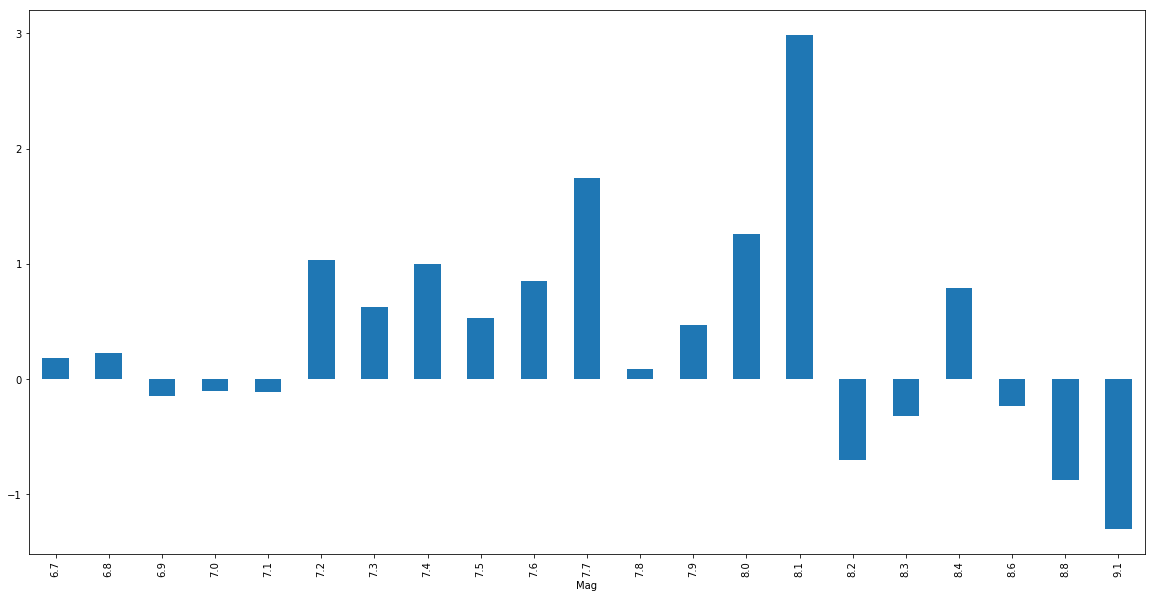

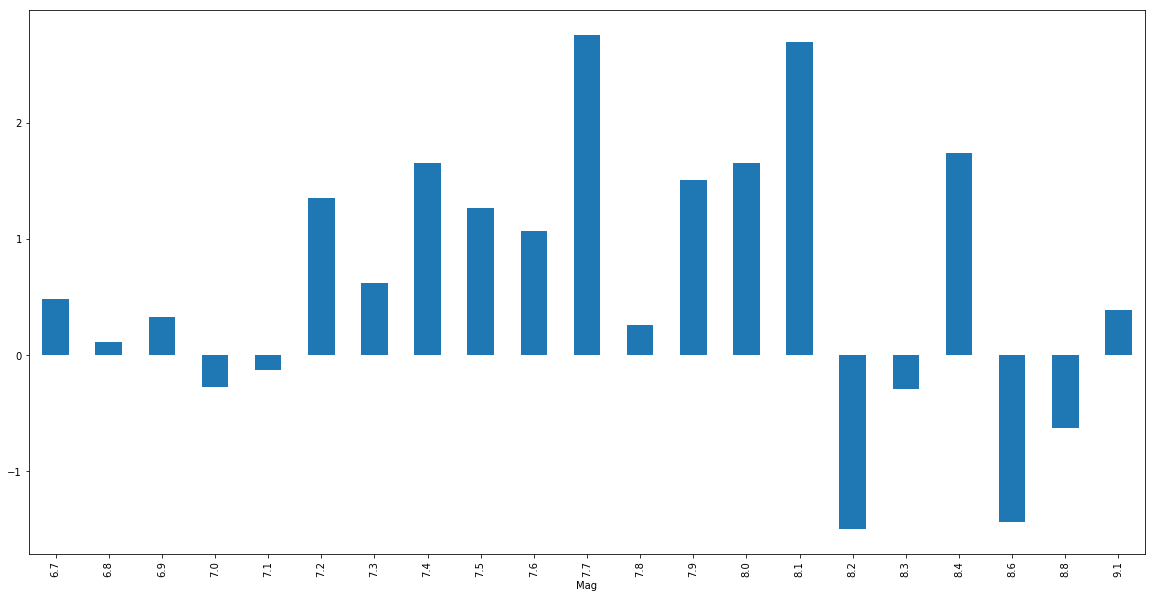

In [0]:
import matplotlib.pyplot as plt
for i in ['Appr_Day_7', 'Appr_Day_14', 'Appr_Day_30']:
  df = df_quake_gold.groupby(['Mag'])[i].mean()
  df.plot.bar(figsize=(20, 10))
  plt.show()

In [0]:
df_quake_gold.Mag.value_counts().sort_index()

6.7    299
6.8    231
6.9    191
7.0    161
7.1    124
7.2     97
7.3     64
7.4     53
7.5     47
7.6     47
7.7     38
7.8     29
7.9     23
8.0     13
8.1      6
8.2      9
8.3      6
8.4      2
8.6      2
8.8      1
9.1      2
Name: Mag, dtype: int64